In [1]:
import numpy as np
from numpy import array
import pandas as pd
import math
import seaborn as sns
from scipy import stats
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# We start by reading the csv data set into python

df = pd.read_csv(r'C:\Users\ASUS\Thinkful_Projects\Capstone_1\all_seasons.csv')
#df.info()

In [3]:
# Data Cleaning:
# We need to clean the data of values that will not be pertinent to our analysis.
# As we'll comparing draft pick number from the first round-the'Undrafted' values can be removed

df_0 = df.loc[(df['draft_number'] != 'Undrafted')]
#df_0.dtypes

In [4]:
# Data Cleaning:
# We need to convert some of the field dtypes so we can sort and group more easily later

cols = ['draft_year', 'draft_round', 'draft_number']
df_0[cols] = df_0[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df_0.dtypes

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year             int64
draft_round            int64
draft_number           int64
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [5]:
# Data Wrangling:
# Because the original data set inlcudes draft year obeservations from years as far back as 1963
# we are going to dial in on a more contemporary and representative sample. So I've chosen to collect from 2010 until now, 
# (less the current seasoned of 2019=20). 

df_1 = df_0.loc[
    (df_0['draft_year'] >= 2010)  
    & (df_0['draft_round'] == 1) 
    & (df_0['season'] != '2019-20')
]

#df_1.info()

In [6]:
# Data Wrangling:
# Now that we have all player observations from 2010-present(less current season). We can see that some of those observations
# are of the same player for multiple seasons, so we will need to organize the data by player_name and secondly sort
# by their own individual and chronological seasons of play. For the sake of estalbishing congrous samples we will only be focusing
# on player's first three years of play.

df_2 = df_1.groupby(['player_name']).apply(lambda x: x.sort_values(['season'])).reset_index(drop=True)
df_3 = df_2.groupby('player_name').head(3)

counts = df_3['player_name'].value_counts()

results_df = df_3[~df_3['player_name'].isin(counts[counts < 3].index)]

results_df


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,8200,Aaron Gordon,ORL,19.0,205.74,99.790240,Arizona,USA,2014,1,...,5.2,3.6,0.7,-5.6,0.064,0.171,0.156,0.517,0.064,2014-15
1,8600,Aaron Gordon,ORL,20.0,205.74,99.790240,Arizona,USA,2014,1,...,9.2,6.5,1.6,-1.3,0.089,0.210,0.171,0.541,0.103,2015-16
2,9145,Aaron Gordon,ORL,21.0,205.74,99.790240,Arizona,USA,2014,1,...,12.7,5.1,1.9,-2.8,0.054,0.141,0.200,0.530,0.097,2016-17
6,8201,Adreian Payne,MIN,24.0,208.28,111.130040,Michigan State,USA,2014,1,...,6.7,5.1,0.9,-16.9,0.073,0.186,0.176,0.443,0.067,2014-15
7,8923,Adreian Payne,MIN,25.0,208.28,107.501304,Michigan State,USA,2014,1,...,2.5,2.1,0.6,-10.8,0.049,0.220,0.180,0.422,0.093,2015-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,6707,Xavier Henry,NOH,21.0,198.12,99.790240,Kansas,USA,2010,1,...,5.3,2.4,0.8,-3.2,0.039,0.124,0.188,0.450,0.081,2011-12
1124,7175,Xavier Henry,NOH,22.0,198.12,99.790240,Kansas,USA,2010,1,...,3.9,1.8,0.3,-13.9,0.038,0.146,0.173,0.481,0.036,2012-13
1129,8141,Zach LaVine,MIN,20.0,195.58,83.007336,UCLA,USA,2014,1,...,10.1,2.8,3.6,-14.5,0.016,0.116,0.224,0.515,0.250,2014-15
1130,9063,Zach LaVine,MIN,21.0,195.58,85.728888,UCLA,USA,2014,1,...,14.0,2.8,3.1,-5.5,0.014,0.100,0.233,0.548,0.187,2015-16


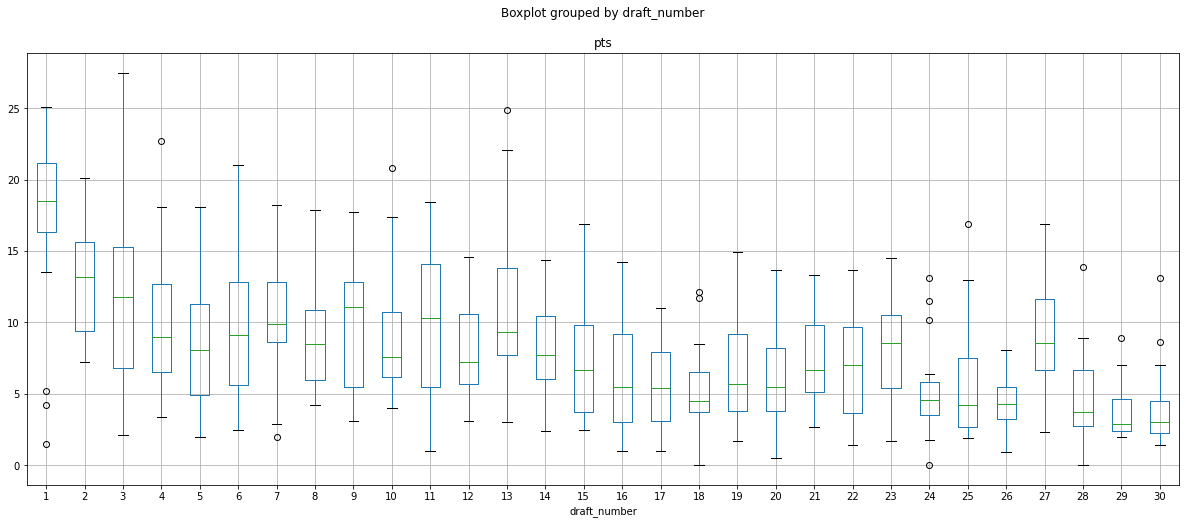

In [47]:
# Data Vizualization:
# We can already vizualize trends among several of the metrics, by draft_number, but we should explore this more closely
# to our hypothesis by splitting the data set into two groups.

results_df.boxplot('pts', by='draft_number', figsize=(20, 8))
plt.show()

In [9]:
# Data Wrangling:
# We can now split our dataframe in two to examine the differences between the highly coveted 14 draft picks and the remaining
# draft picks of the first round.

fr_top_picks = results_df.loc[results_df['draft_number'] <= 14]
#firstr_top_picks.count()

fr_bottom_picks = results_df.loc[results_df['draft_number'] >= 15]
#firstr_bottom_picks.count()

DescribeResult(nobs=285, minmax=(1.0, 27.5), mean=10.375087719298245, variance=27.939201136644428, skewness=0.6753466441903969, kurtosis=-0.01835634983070822)
DescribeResult(nobs=282, minmax=(0.0, 16.9), mean=6.054255319148937, variance=13.68669001287196, skewness=0.8278972982417563, kurtosis=-0.07370891263186996)


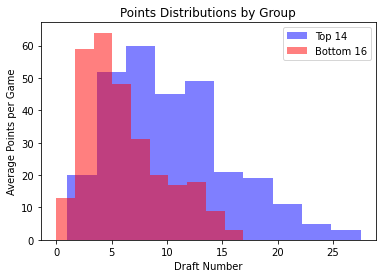

In [10]:
# Data Analysis:
# We can see below that when comparing points between the two groups there is a difference
# in the distribution of points scored over three seasons. We can also visually confirm a safely assumable normal ditribution 
# of data. Furthermore, the skewness and kurtosis measures are well within the ranges for the data to be considered normally 
# distributed. 

plt.hist(fr_top_picks['pts'], alpha= .5, color= 'b', label= 'Top 14')
plt.hist(fr_bottom_picks['pts'], alpha= .5, color= 'r', label= 'Bottom 16')
plt.title('Points Distributions by Group')
plt.xlabel('Draft Number')
plt.ylabel('Average Points per Game')
plt.legend()

print(stats.describe(fr_top_picks['pts']))
print(stats.describe(fr_bottom_picks['pts']))
plt.show()

In [11]:
# From the Shapiro-Wilk test, we can see that the W values statisfy parametric constraints (close to 1) but the p-values are not > .05, 
# within those same parameters, which can indicate that we are not dealing with normal distributions.

# However, you will recall that we received normally parametric skewness and kurtosis metrics, so we can in fact, 
# continue treating the data sets as normal distributions.

print('Points, Top 14:', stats.shapiro(fr_top_picks['pts']))
print('Points, Bottom 16:', stats.shapiro(fr_bottom_picks['pts']))

Points, Top 14: ShapiroResult(statistic=0.961229145526886, pvalue=6.569277388734918e-07)
Points, Bottom 16: ShapiroResult(statistic=0.9304066896438599, pvalue=3.157550054755376e-10)


In [12]:
# As we are dealing with normal distributions of data we will execute a T-test for these two independent groups, so that
# we might measure the statistical signifance of their difference in points scored over three seasons of play in the NBA

stats.ttest_ind(fr_top_picks['pts'], fr_bottom_picks['pts'])

# Because p-value < 0.01
# We can reject the null hypothesis that there is no statistical difference in points between
# the top 14 draft picks of the First Round and the remaining draft picks.

Ttest_indResult(statistic=11.265790736651459, pvalue=1.0687850812349654e-26)

In [13]:
# Conclusively, we can interpret the confidence interval results below as such: 
# With 95% confidence, the top 14 draft picks of the First Round, as a group, score on average between 3.57 to 5.07 pts more than
# the rest of the combined draft picks of the First Round. 

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(fr_bottom_picks['pts'], fr_top_picks['pts'])

'The difference in means at the 95% confidence interval (two-tail) is between 3.5704655372380563 and 5.071199263060559.'

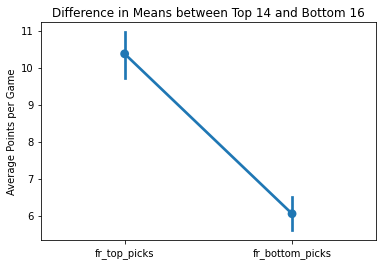

In [14]:
# We can visually observe the difference in means between the two groups using a point plot
# In doing so it becomes very apparent that the means of average points per game are significantly different.

g = sns.pointplot(data=[fr_top_picks['pts'],
                        fr_bottom_picks['pts']])
                        
g.set(xticklabels = ['fr_top_picks', 'fr_bottom_picks'])
plt.title('Difference in Means between Top 14 and Bottom 16')
plt.ylabel('Average Points per Game')
plt.show()

In [33]:
# Effect Size is a necessary calculation, because we want to quantify the magnitude of the effect we observed
# in our ttest above. We accomplish this by utlizing Cohen's d calculation.

def effect_size_calc(d1,d2):
    # calculate the size of samples
    n_obs1, n_obs2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1_var, s2_var = (d1).var(), (d2).var()
    # calculate the pooled standard deviation
    pooled_stdev = np.sqrt(((n_obs1 - 1) * s1_var + (n_obs2 - 1) * s2_var) / (n_obs1 + n_obs2 - 2))
    # calculate the means of the samples
    u1, u2 = (d1).mean(), (d2).mean()
    # calculate the effect size
    return (u1 - u2) / pooled_stdev

d = effect_size_calc(fr_top_picks['pts'], fr_bottom_picks['pts'])
print('Cohens d: %.3f' % d)

Cohens d: 0.946


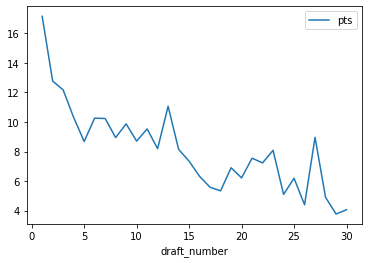

In [46]:
# It may serve deeper analysis at a later juncture to examine the performance differences amongst the Non-Lottery Draft Picks,
# as there appears to be less variance in that bottom half of draft picks.

results_df.groupby(['draft_number']).mean().reset_index().plot(kind='line',x='draft_number',y='pts')
plt.show()